# **CRASH COURSE IN STATISTICAL LEARNING - DATA TRANSFORMATION AND NORMALIZATION**


# **ABTRACT:**

This notebook mainly focuses on Data transformation and normalization techniques. The goal is to improve the performance of the models by making the data more suitable for analysis.

Lets see first see what is Data Transformation and Data Normalization:

**Data Transformation:** Data transformation is the process of converting data from one format or structure to another, in order to make it more suitable for analysis or to prepare it for use with a specific machine learning algorithm.


1. **Feature scaling:** This technique involves scaling the values of 
numeric features to a standard range, such as between 0 and 1, or to a normal distribution with mean 0 and standard deviation 1. This can help prevent features with large ranges from dominating the model and can also help improve convergence for models that use gradient-based optimization.

2. **Dimensionality reduction:** This technique involves reducing the number of features in the dataset while preserving as much of the relevant information as possible. This can help improve model performance by reducing the complexity of the model and reducing the risk of overfitting.

3. **One-hot encoding:** This technique is used to convert categorical features into binary vectors that can be used as input to machine learning algorithms. This can help preserve the information in the categorical features and can also help prevent the model from treating the categories as ordinal values.

4. **Imputation:** This technique involves filling in missing values in the dataset with estimated values. There are several methods for imputation, including mean imputation, median imputation, and k-nearest neighbor imputation.

5. **Text preprocessing:** This technique is used for natural language processing tasks and involves transforming raw text into a format that can be used as input to machine learning algorithms. Common text preprocessing techniques include tokenization, stemming, and stop word removal.

6. **Binning**: This technique involves grouping continuous variables into discrete bins or categories. This can help simplify the input to the model and can also help capture non-linear relationships between variables.

7. **Feature extraction:** This technique involves deriving new features from existing features that can better capture the information relevant to the problem at hand. For example, in computer vision, features can be extracted from images that capture edges, corners, and other patterns.

**Data Normalization**: Data normalization is the process of transforming numerical data to a common scale, usually between 0 and 1, or with a mean of 0 and a standard deviation of 1. The goal of normalization is to eliminate the effect of scale on the analysis, as different features or variables may have different scales, units, and ranges.

Normalization is an important step in preparing data for machine learning algorithms, as it can help improve the accuracy and performance of the model. Normalization can also help in reducing the impact of outliers and making the data more interpretable.


1.**Min-Max scaling**: This technique scales the data to a specific range (e.g., 0 to 1) by subtracting the minimum value and dividing by the range. This ensures that all values are within the same range and can be useful for algorithms that use distance measures, such as KNN.

2.**Z-score normalization:** This technique scales the data to have a mean of 0 and a standard deviation of 1 by subtracting the mean and dividing by the standard deviation. This ensures that the data is centered around 0 and has the same scale, which can be useful for algorithms that use gradient descent, such as linear regression and neural networks.

3.**Log transformation:** This technique applies a logarithmic function to the data, which can help normalize skewed data distributions. This can be useful for algorithms that assume a normal distribution, such as Gaussian Naive Bayes.

4.**Power transformation:**This technique applies a power function to the data, which can help normalize non-linear relationships between variables. This can be useful for algorithms that assume a linear relationship, such as linear regression.

5.**Robust scaling:** This technique scales the data based on the interquartile range (IQR), which makes it more robust to outliers. It subtracts the median and divides by the IQR, which scales the data to a range that is less affected by extreme values.

**Data** 
 Currently I am using Heart Disease Cleveland UCI dataset from kaggle : https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci

Some **context** about the dataset:
There are 13 attributes

age: age in years

sex: sex (1 = male; 0 = female)

cp: chest pain 

-- Value 0: typical angina

-- Value 1: atypical angina

-- Value 2: non-anginal pain

-- Value 3: asymptomatic

trestbps: resting blood pressure (in mm Hg on admission to the hospital)

chol: serum cholestoral in mg/dl

fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg: resting electrocardiographic results

-- Value 0: normal

-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeak = ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment

-- Value 0: upsloping

-- Value 1: flat

-- Value 2: downsloping

ca: number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
and the label

condition: 0 = no disease, 1 = disease


**Actual numerical features**: age, trestbps, chol, thalach, oldpeak

**Categorical features**: sex, cp, fbs, restecg, exang, slope, ca, thal

**Load the dataset**

Importing libraries

In [218]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [219]:
data = pd.read_csv("https://raw.githubusercontent.com/adduriAishwarya/Crash-Course-Statistical-Learning-/main/heart_cleveland_upload.csv")

# **Exploratory Data Analysis**

In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [221]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


We can notice here that all of our variables are already in numerical format, if they weren't we would have had to convert the categorical variables into numerical format:

When working with machine learning algorithms, it is often necessary to convert categorical variables into numerical variables. Here are some common techniques used to do this:

**One-Hot Encoding**: This is a technique used to represent a categorical variable with multiple levels as a binary vector of 0s and 1s. For each level of the categorical variable, a new binary feature is created with a value of 1 if the original feature has that level, and 0 otherwise.

**Label Encoding**: This technique assigns a unique numerical value to each level of a categorical variable. This is often used for ordinal variables, where the order of the levels is important.

**Binary Encoding**: This technique converts each category into a binary code, where each digit in the code represents a separate category. This can be useful when dealing with high cardinality categorical variables.

**Count Encoding**: This technique replaces each category with the number of times it appears in the dataset. This can be useful for high cardinality categorical variables, as it can reduce the dimensionality of the data.

**Target Encoding**: This technique replaces each category with the mean of the target variable for that category. This can be useful for classification tasks, where the goal is to predict the target variable.

The choice of technique depends on the type of categorical variable, the number of levels, and the requirements of the machine learning algorithm. 

In [222]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Here, we can see that some of the features/variables have smaller values like between 0-3 while others have very high values like in the range of 200-300. 

Having variables with widely varying ranges can cause issues when building a machine learning model because some variables may have a greater impact on the output than others simply because their values are larger. This can lead to bias in the model and result in poor performance.

To address this issue, it is important to normalize the data by scaling the variables to a common range. This can be done using one of the normalization techniques such as Min-Max scaling or Z-score normalization.

**Data preprocessing**

In [223]:
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

We can also see here that we don't have any missing values in our dataset, but had there be been missing values in the dataset, we would need to use data imputation methods to deal with them. Here are some common methods used for data imputation:

**Mean or Median Imputation:** This technique involves replacing missing values with the mean or median value of the variable. This method works well when the variable follows a normal distribution and the missing values are missing at random.

**Mode Imputation:** This technique involves replacing missing values with the mode value (most common value) of the variable. This method works well for categorical variables.

**Regression** Imputation: This technique involves using a regression model to predict the missing values based on the values of other variables in the dataset.

**K-Nearest Neighbor Imputation:** This technique involves finding the k-nearest neighbors of the observation with missing values and imputing the missing values with the average of the neighbors' values.

**Multiple Imputation:** This technique involves creating multiple imputed datasets, where missing values are imputed multiple times with different imputation models, and the results are combined using statistical methods.

Now, lets look at **Outliers**

I am using boxplots to visualize the outliers here:

Some important things to keep in mind while using and interpreting using boxplots:
 
* The data must have metric scale level - like it must be measurable values - which we have here, (if your data doesn't have all your features in metric scale level - first convert them into numerical i.e., ,metric scale level and then create a box plot. 

* Box plots are commonly used to display the distribution of a continuous variable, but they can also be used to compare the distribution of different groups or categories.

* Identify the quartiles: Box plots are based on quartiles, which divide the data into four equal parts. The first quartile (Q1) represents the 25th percentile of the data, the second quartile (Q2) represents the median, and the third quartile (Q3) represents the 75th percentile.

<Axes: >

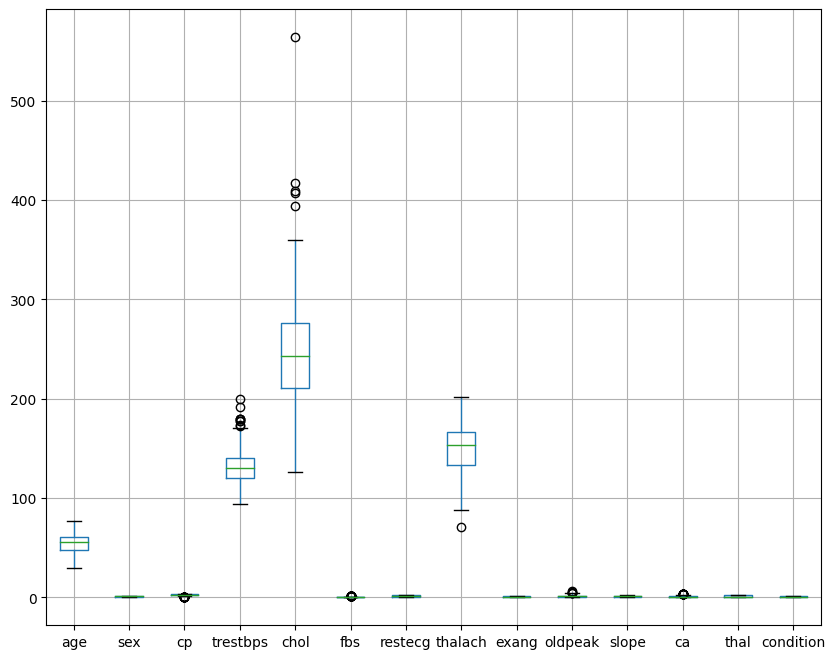

In [224]:
data.boxplot(column=['age','sex','cp','trestbps', 'chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','condition'], figsize=(10,8))

Here, we can see that we have many outliers in age, trestbps, chol an d thalach  outliers

**Identifying Outliers using IQR:**



In [225]:
# Calculate the IQR
Q1 = data['trestbps'].quantile(0.25)
Q3 = data['trestbps'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = data[(data['trestbps'] < (Q1 - 1.5 * IQR)) | (data['trestbps'] > (Q3 + 1.5 * IQR))]

In [226]:
print(outliers)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
9     59    1   0       178   270    0        2      145      0      4.2   
45    54    1   1       192   283    0        2      195      0      0.0   
76    68    1   2       180   274    1        2      150      1      1.6   
117   52    1   2       172   199    1        0      162      0      0.5   
167   66    0   3       178   228    1        0      165      1      1.0   
178   64    0   3       180   325    0        0      154      1      0.0   
209   59    0   3       174   249    0        0      143      1      0.0   
234   56    0   3       200   288    1        2      133      1      4.0   
242   55    0   3       180   327    0        1      117      1      3.4   

     slope  ca  thal  condition  
9        2   0     2          0  
45       0   1     2          1  
76       1   0     2          1  
117      0   0     2          0  
167      1   2     2          1  
178      0   0     0          0  
2

**Identifying outliers using Z score**

In [227]:
num_rows = data.shape[0]
print("Number of rows:", num_rows)

Number of rows: 297


In [228]:
# trestbps chol thalach oldpeak 
import numpy as np
from scipy import stats

# Calculate the z-score of each data point
z = np.abs(stats.zscore(data['thal']))

# Identify outliers using the z-score method
outliers = data[z > 3]

In [229]:
print(outliers)

Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, condition]
Index: []


This is returning us empty data frame meaning there are no outliers assosciated with thal column

Like this we can identify the outliers using IQR method and Z score method

**How to handle these outliers?**

There are several techniques that can be used to handle outliers in a dataset. Here are some common methods:

* Remove the outliers: One way to handle outliers is to simply remove them from the dataset. However, this approach should be used with caution, as it can result in loss of important information.

* Winsorization: Winsorization is a method that replaces extreme values with less extreme values. For example, the top 5% of values may be replaced with the value at the 95th percentile, and the bottom 5% of values may be replaced with the value at the 5th percentile.

* Transformation: Transformation involves applying a mathematical function to the data to change its scale. Common transformations include logarithmic, square root, and reciprocal transformations.

* Binning: Binning involves grouping values into bins or categories. This can be useful for handling outliers in categorical data.

* Imputation: Imputation involves replacing missing values with estimated values. This can be done by using the mean, median, or mode of the data.

Amongst these, lets try, one of these methods: Removing Outliers

**Removing the outliers:**

There were total 297 rows of data, before we removed the outliers


First lets create a copy of our original dataframe

In [230]:
data_RO = data.copy()

In [231]:
num_rows = data_RO.shape[0]
print("Number of rows:", num_rows)

Number of rows: 297


Lets find the number of outliers in the thal column

In [232]:
# trestbps chol thalach oldpeak 
import numpy as np
from scipy import stats

# Calculate the z-score of each data point
z = np.abs(stats.zscore(data_RO['thalach']))

# Identify outliers using the z-score method
outliers = data_RO[z > 3]

In [233]:
print(outliers)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   67    1   3       120   237    0        0       71      0      1.0   

     slope  ca  thal  condition  
164      1   0     0          1  


Here, we have identified that there are ouliers in trestbps, chol, thalach and oldpeak columns. I am removing all these outliers at once.

In [234]:
import numpy as np
from scipy import stats

# Calculate the z-score for each data point in selected columns
selected_cols = ['trestbps', 'chol', 'thalach', 'oldpeak']
z = np.abs(stats.zscore(data_RO[selected_cols]))

# Identify and remove outliers using the z-score method
threshold = 3
data_RO = data_RO[(z < threshold).all(axis=1)]

After removing all the outliers we are left with 288 rows i.e., we dropped 297-288 = 9 rows.

In [235]:
num_rows = data_RO.shape[0]
print("Number of rows:", num_rows)

Number of rows: 288


Now, going back to our boxplot, we can see that, different column values in our dataframe are in different ranges, so we need to normalize them. 

And as discusses prior we know there are many data normalization techniques. We are going to perform min-max scaling and Z-score normalization. 



**SCATTER PLOT AFTER REMOVING OUTLIERS**

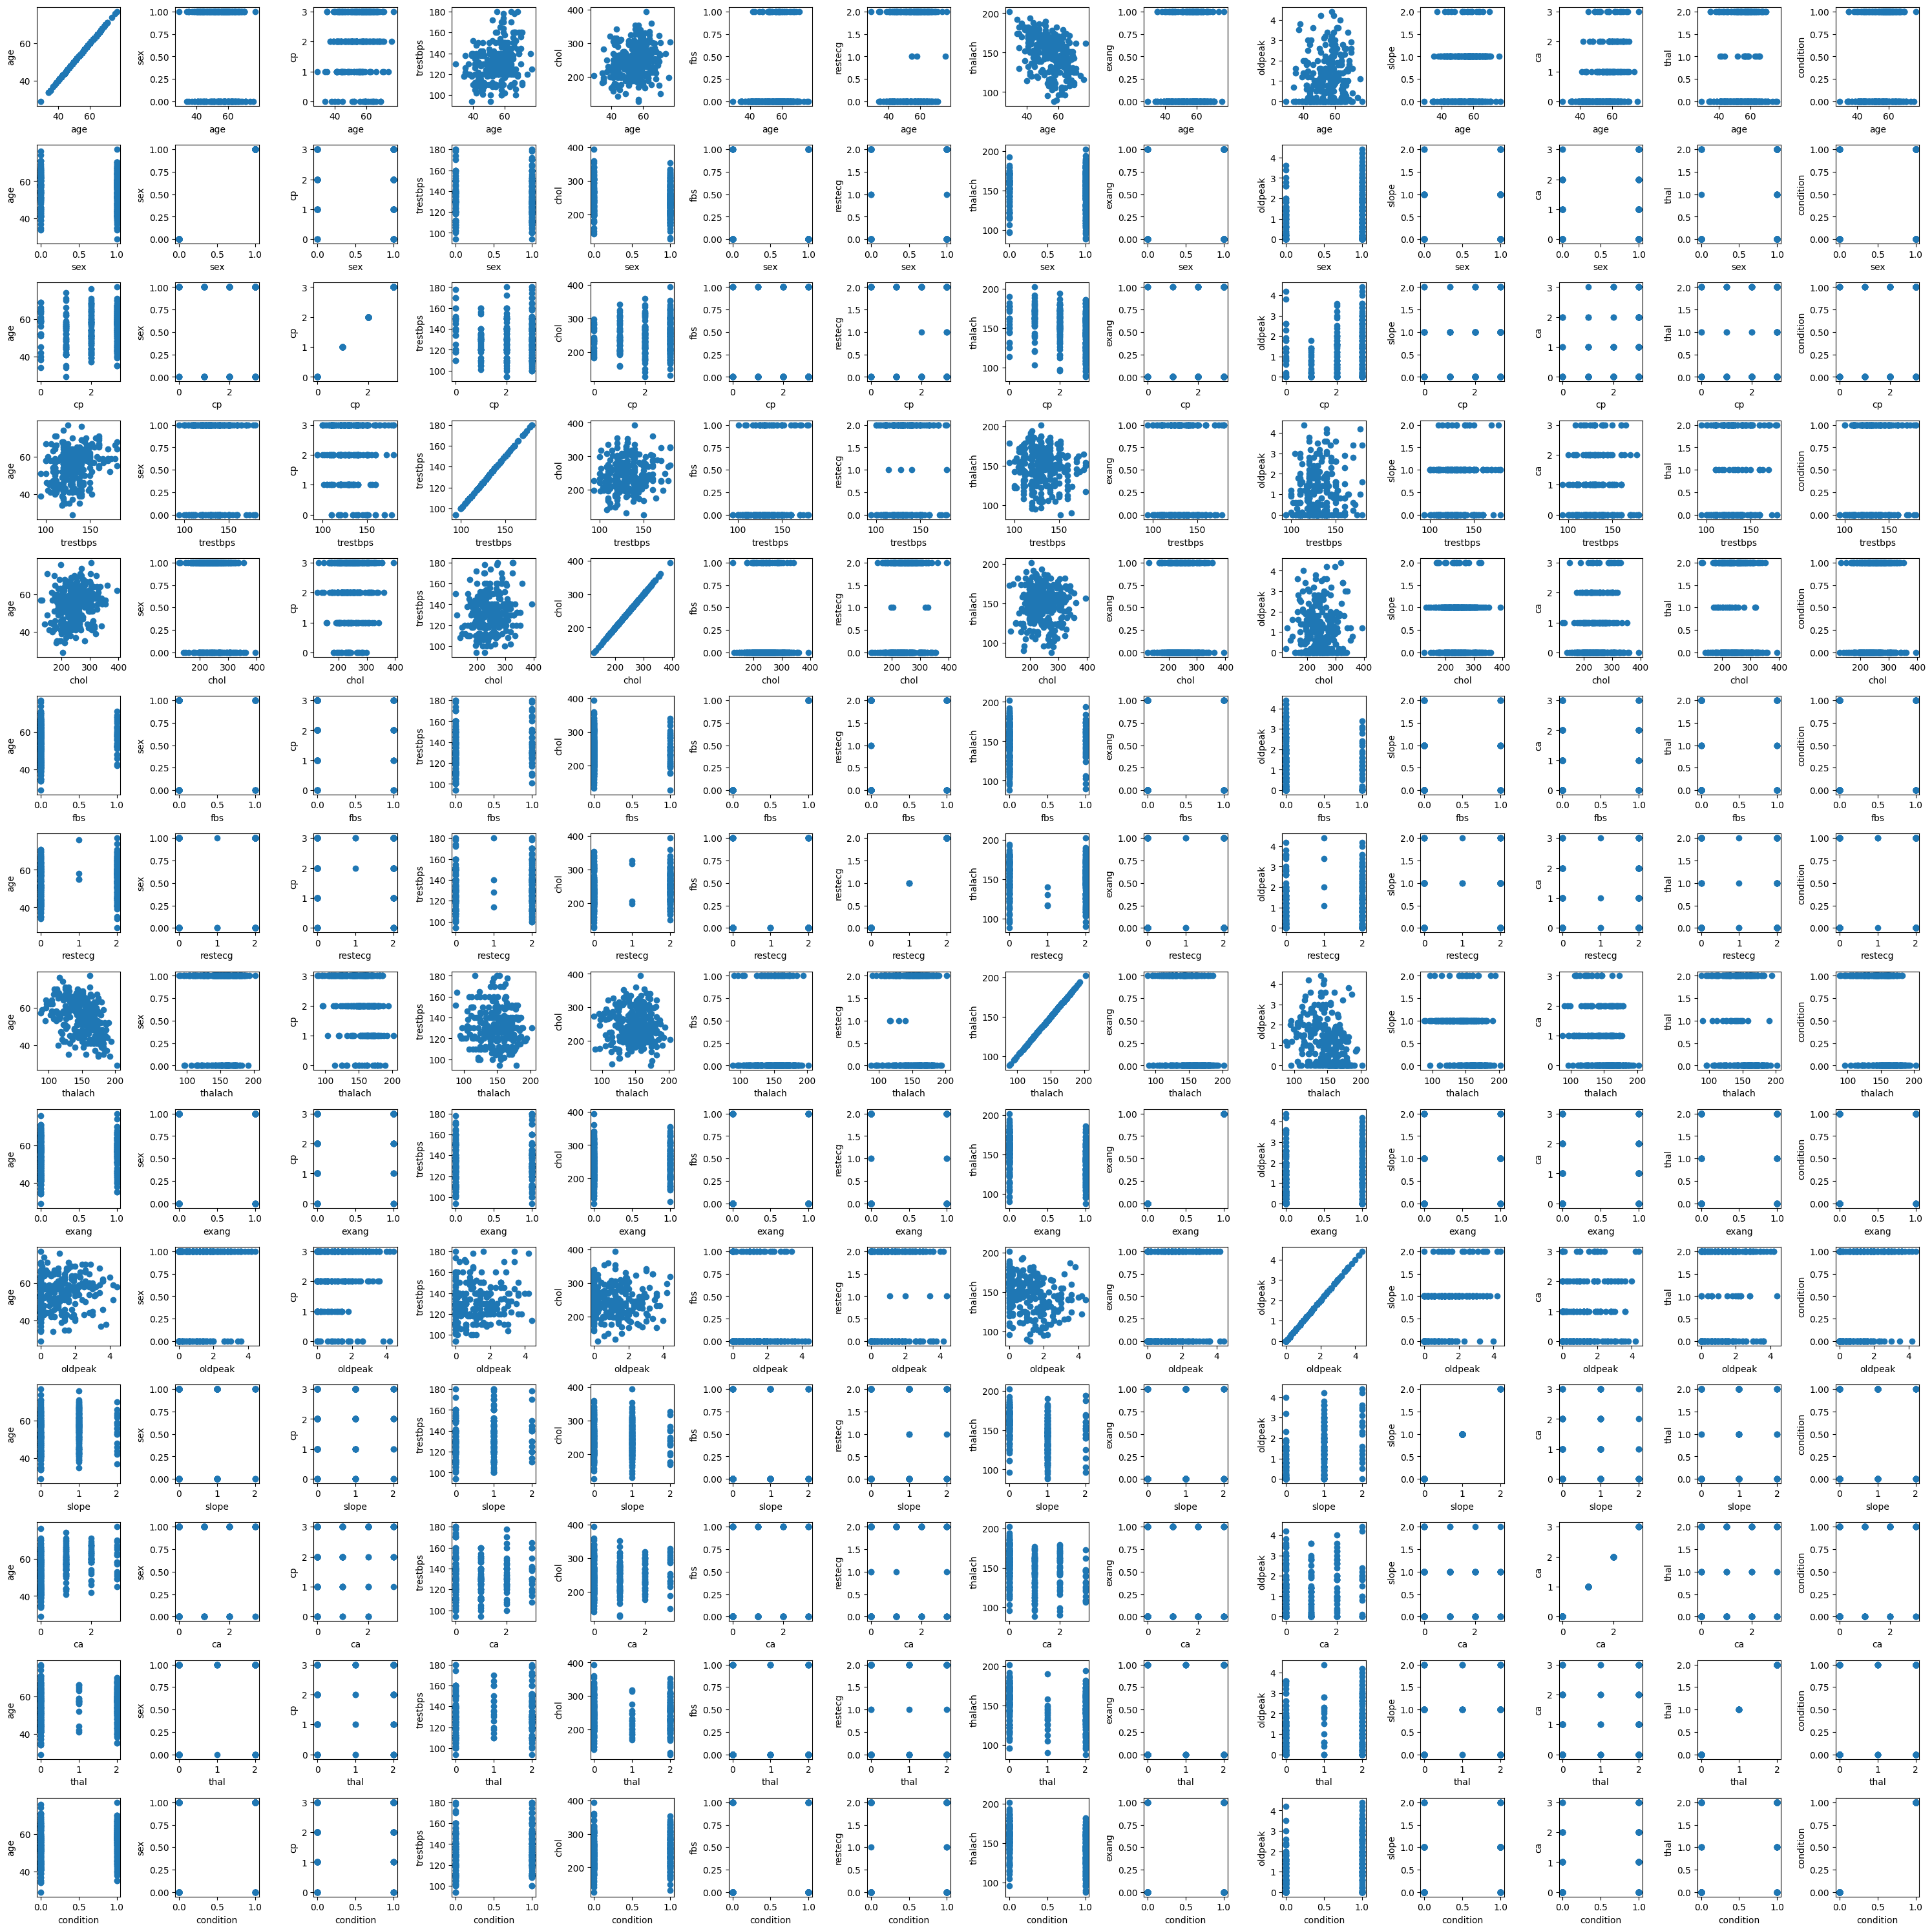

In [236]:
import matplotlib.pyplot as plt
import pandas as pd



# create a scatter plot for each pair of columns
fig, axes = plt.subplots(nrows=len(data_RO.columns), ncols=len(data_RO.columns), figsize=(30, 30))
for i, column1 in enumerate(data_RO.columns):
    for j, column2 in enumerate(data_RO.columns):
        axes[i,j].scatter(data_RO[column1], data_RO[column2])
        axes[i,j].set_xlabel(column1)
        axes[i,j].set_ylabel(column2)

# show the plot
plt.tight_layout()
plt.show()



**HISTOGRAM**

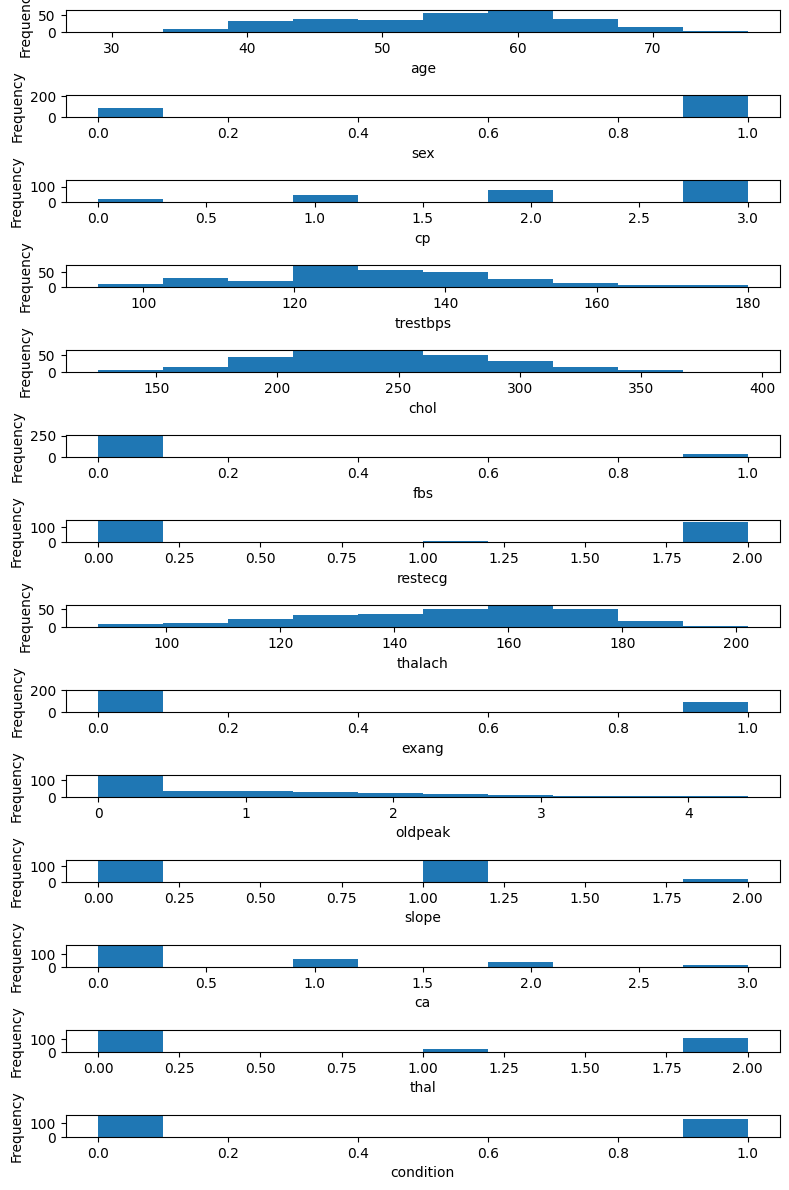

In [237]:
import matplotlib.pyplot as plt
import pandas as pd



# create a histogram for each column
fig, axes = plt.subplots(nrows=len(data_RO.columns), figsize=(8, 12))
for i, column in enumerate(data_RO.columns):
    axes[i].hist(data_RO[column])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# show the plot
plt.tight_layout()
plt.show()


# **NORMALIZATION**

Lets first perform **MIN-MAX SCALAR** DATA NORMALIZATION TECHNIQUE:

In [238]:
from sklearn.preprocessing import MinMaxScaler
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()
# Normalize all columns
data_RO_MM = pd.DataFrame(scaler.fit_transform(data_RO), columns=data_RO.columns)
# Print the normalized dataframe
print(data_RO_MM)

          age  sex   cp  trestbps      chol  fbs  restecg   thalach  exang  \
0    0.833333  1.0  0.0  0.767442  0.402985  1.0      1.0  0.377193    0.0   
1    0.833333  0.0  0.0  0.534884  0.421642  0.0      0.0  0.552632    0.0   
2    0.770833  0.0  0.0  0.651163  0.373134  0.0      0.0  0.228070    0.0   
3    0.750000  1.0  0.0  0.511628  0.582090  1.0      1.0  0.754386    0.0   
4    0.729167  1.0  0.0  0.186047  0.317164  0.0      1.0  0.491228    1.0   
..        ...  ...  ...       ...       ...  ...      ...       ...    ...   
283  0.229167  1.0  1.0  0.674419  0.361940  0.0      0.0  0.815789    0.0   
284  0.208333  1.0  1.0  0.279070  0.347015  0.0      0.0  0.456140    0.0   
285  0.125000  1.0  1.0  0.302326  0.268657  0.0      0.0  0.368421    1.0   
286  0.125000  0.0  1.0  0.511628  0.212687  0.0      0.0  0.824561    0.0   
287  0.125000  1.0  1.0  0.372093  0.582090  0.0      1.0  0.596491    1.0   

      oldpeak  slope        ca  thal  condition  
0    0.022727

Now lets perform **Z-SCORE** DATA NORMALIZATION TECHNIQUE:

In [239]:
from sklearn.preprocessing import StandardScaler
# Create an instance of StandardScaler
scaler = StandardScaler()
# Normalize all columns
data_RO_ZSCORE = pd.DataFrame(scaler.fit_transform(data_RO), columns=data_RO.columns)
# Print the normalized dataframe
print(data_RO_ZSCORE)

          age      sex        cp  trestbps      chol       fbs   restecg  \
0    1.615179  0.67420 -2.216720  1.698244 -0.233377  2.454463  1.028223   
1    1.615179 -1.48324 -2.216720  0.522254 -0.124442 -0.407421 -0.986255   
2    1.284331 -1.48324 -2.216720  1.110249 -0.407672 -0.407421 -0.986255   
3    1.174049  0.67420 -2.216720  0.404655  0.812394  2.454463  1.028223   
4    1.063766  0.67420 -2.216720 -1.241732 -0.734475 -0.407421  1.028223   
..        ...      ...       ...       ...       ...       ...       ...   
283 -1.583013  0.67420  0.882384  1.227848 -0.473033 -0.407421 -0.986255   
284 -1.693296  0.67420  0.882384 -0.771335 -0.560180 -0.407421 -0.986255   
285 -2.134426  0.67420  0.882384 -0.653736 -1.017705 -0.407421 -0.986255   
286 -2.134426 -1.48324  0.882384  0.404655 -1.344508 -0.407421 -0.986255   
287 -2.134426  0.67420  0.882384 -0.300939  0.812394 -0.407421  1.028223   

      thalach     exang   oldpeak     slope        ca      thal  condition  
0   -0.838

The key differences between Min-Max scaler and Z-score data normalization techniques are:

* Range of values: Min-Max scaler scales the values in a fixed range of 0 to 1, while Z-score normalization scales the values around 0 with a standard deviation of 1.

* Sensitivity to outliers: Min-Max scaler is sensitive to outliers, as it maps the data to a fixed range. If there are outliers, they can affect the entire scale of the data. On the other hand, Z-score normalization is not sensitive to outliers, as it is based on the distribution of the data.

* Impact on the mean and standard deviation: Min-Max scaler does not change the mean and standard deviation of the data, while Z-score normalization centers the data around 0 and scales it to have a standard deviation of 1.

* Use case: Min-Max scaler is usually used when the distribution of data is not known, or when the data is not normally distributed, while Z-score normalization is commonly used when the data is normally distributed.

So, uptill now, 

Our data has all the values in the numerical format.

NO missing values.

Outliers are handled and 

values are normalized, now lets build models. 

**X, Y split**

**Logistic Regression Model on orginal sample**

In [240]:
X = data[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]

y = data['condition']

In [241]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the test data
y_pred = model.predict(X_test)

# Calculate accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy of the model: {:.2f}%".format(accuracy*100))


Accuracy of the model: 73.33%


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Logistic Regression Model on data_RO - data without outliers**

In [242]:
X = data_RO[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]

y = data_RO['condition']

In [243]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the test data
y_pred = model.predict(X_test)

# Calculate accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy of the model: {:.2f}%".format(accuracy*100))


Accuracy of the model: 84.48%


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Logistic Regression Model on data_RO_MM - data without outliers and MinMax scalar normalized**

In [244]:
X = data_RO_MM[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]

y = data_RO_MM['condition']

In [245]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the test data
y_pred = model.predict(X_test)

# Calculate accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy of the model: {:.2f}%".format(accuracy*100))


Accuracy of the model: 86.21%


We can see that the accuracy of the model is improving from as the quality of the data is imprving from our original dataset giving only 73.33% and the one without outliers giving 84.48% and the one without outliers and normalized giving 86.21%. 

**Random forest model**

In [246]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest regressor with 100 trees
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

print('Mean squared error:', mse)


Mean squared error: 0.1365103448275862


**Descision Tree Model**

In [247]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree model
model = DecisionTreeClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the test data
y_pred = model.predict(X_test)

# Calculate accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy of the model: {:.2f}%".format(accuracy*100))


Accuracy of the model: 74.14%


**SVM model**

In [248]:
# Import necessary libraries
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM model
model = svm.SVC(kernel='linear')

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the test data
y_pred = model.predict(X_test)

# Calculate accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy of the model: {:.2f}%".format(accuracy*100))


Accuracy of the model: 84.48%


**Linear Model**

In [249]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the test data
y_pred = model.predict(X_test)

# Calculate mean squared error of the model
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Mean squared error: {:.2f}".format(mse))




Mean squared error: 0.12


**FEATURE ENGINEERING**

We can further work on improving the accuracy with feature engineering and selecting which features are important and dropping some features with correlation 

LETS VISUALIZE CORRELATION USING HEATMAP

<Axes: >

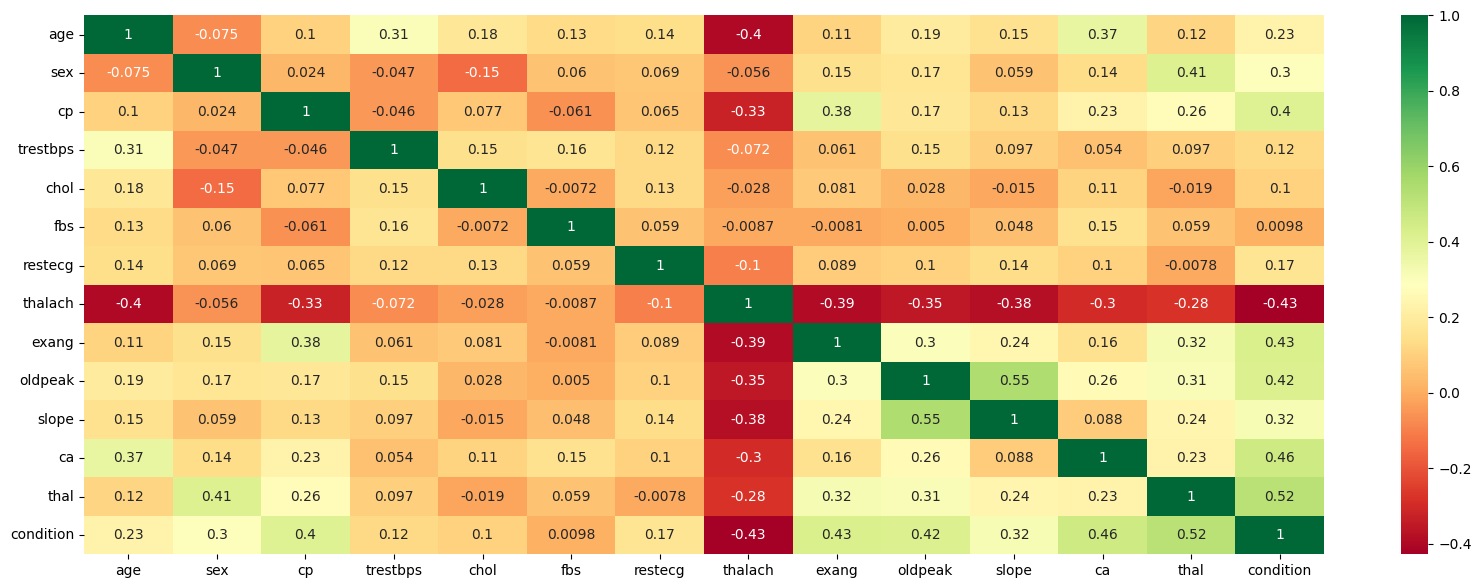

In [250]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(data_RO_MM.corr(), annot=True, cmap='RdYlGn')

In [251]:
import pandas as pd

# Get the correlation matrix of all features
corr_matrix = data_RO_MM.corr()

# Get the correlation of each feature with the target variable
corr_with_target = corr_matrix['condition'].sort_values(ascending=False)

# Print the correlation values
print(corr_with_target)


condition    1.000000
thal         0.516931
ca           0.459135
exang        0.425137
oldpeak      0.419340
cp           0.403948
slope        0.319015
sex          0.295426
age          0.228508
restecg      0.166622
trestbps     0.124581
chol         0.104355
fbs          0.009846
thalach     -0.428513
Name: condition, dtype: float64


Based on the correlation values, the following features have the highest correlation with the target variable (condition):

thal (0.516931)

ca (0.459135)

exang (0.425137)

oldpeak (0.419340)

cp (0.403948)

The following features have moderate correlation with the target variable:


slope (0.319015)

sex (0.295426)

The following features have weak correlation with the target variable:


age (0.228508)

restecg (0.166622)

trestbps (0.124581)

chol (0.104355)

fbs (0.009846)

And the following feature has negative correlation with the target variable:


thalach (-0.428513)


I am going to the features with weak correlation with the target variable. Let us see how that impacts the performance of our model.

In [252]:
X = data_RO_MM[['sex','cp','exang','oldpeak','slope','ca','thal']]

y = data_RO_MM['condition']

In [253]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the test data
y_pred = model.predict(X_test)

# Calculate accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy of the model: {:.2f}%".format(accuracy*100))

Accuracy of the model: 87.93%


Dropping weakly correlated features improved the accuracy of the model. 

**SUMMARY:**

Data transformation and normalization are important data preprocessing techniques used in data analysis to improve the quality and accuracy of data. In this data transformation and normalization notebook, various methods can be used to transform and normalize data, such as scaling, logarithmic transformation, standardization, and feature scaling. These techniques help to convert data into a more consistent and standardized format, making it easier to analyze and interpret.

The notebook gives a  brief overview of the importance of data preprocessing and the need for transformation and normalization techniques. It then proceeds to discuss the various techniques that can be used to transform and normalize data, explaining each method in detail and providing examples to illustrate their effectiveness.

The notebook also covers the various tools and libraries that can be used to implement data transformation and normalization, such as NumPy, Pandas, and Scikit-learn. It provides sample code snippets to demonstrate how to implement these techniques using these tools and libraries.

Overall, this data transformation and normalization notebook serves as a useful reference to improve the quality and accuracy of the data through preprocessing techniques. 

**LICENSE**

Copyright (c) 2022 Aishwarya Adduri

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.